In [1]:
import os, sys
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
file = '20191204_peptide_aptamer_pairs_correct.csv'

## General metrics about the file

In [3]:
# Generate a dictionary from peptide --> [(aptamer, read count)]
all_aptamers = []
dataset = {}
with open(file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
        else:
            peptide = row[0]
            aptamer = row[1]
            if "RRRRRR" in peptide:
                continue
            if aptamer == "CTTTGTAATTGGTTCTGAGTTCCGTTGTGGGAGGAACATG":
                continue
            if len(aptamer) < 40:
                continue
            rc = row[2]
            
            # Reformat the peptide
            if '_' in peptide:
                split = peptide.split('_')
                save = split[0]
                if len(save) < 8:
                    continue
                peptide = save 
            if len(peptide) < 8:
                continue
            
            if peptide not in dataset.keys():
                dataset[peptide] = []
            dataset[peptide].append((aptamer, rc))
            all_aptamers.append(aptamer)
        line_count += 1
    print("Number of lines: ", line_count)

Column names are Peptide, Aptamer, Read Count
Number of lines:  770226


435570
count of  3 : 0
count of  4 : 0
count of  5 : 0
count of  6 : 0
count of  7 : 0
count of  8 : 435570


/Users/aishwaryamandyam/anaconda3/envs/research/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/aishwaryamandyam/anaconda3/envs/research/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


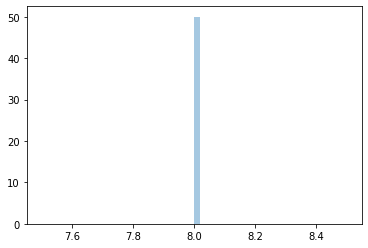

In [4]:
print(str(len(dataset.keys())))
peptides = list(dataset.keys())
lengths = [len(p) for p in peptides]
sns.distplot(lengths, hist=True, norm_hist=True)
for i in range(3, 9):
    print("count of ", i, ":", lengths.count(i))

## Split the dataset into binding affinity groups

In [ ]:
affinity_groups = [0, 0, 0, 0]
x = ['high (> 50)', 'medium (>10)', 'medium-ish (>5)', 'low (<= 5)']
for peptide in dataset:
    for a, r in dataset[peptide]:
        r = int(r)
        if r > 50:
            affinity_groups[0] += 1
        elif r > 10:
            affinity_groups[1] += 1
        elif r > 5:
            affinity_groups[2] += 1
        else:
            affinity_groups[3] += 1

print("Affinity Groups: ", affinity_groups)          
plt.title("Aptamer dataset binding affinity groups (based on read count)")
plt.xlabel("Affinity groups (read count)")
plt.ylabel("Number of samples")
sns.barplot(x, affinity_groups)

## Write the dataset into a json file

In [5]:
# Dictionary should be aptamer --> [(peptide, aff), ...., ]
aptamer_dataset = {}
with open(file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
        else:
            peptide = row[0]
            aptamer = row[1]
            rc = row[2]
            
            # Reformat the peptide
            if '_' in peptide:
                split = peptide.split('_')
                save = split[0]
                if len(save) < 8:
                    continue
                peptide = save 
            if aptamer not in aptamer_dataset.keys():
                aptamer_dataset[aptamer] = []
            
            aptamer_dataset[aptamer].append((peptide, rc))
        line_count +=1

with open('aptamer_dataset.json', 'w') as f:
    json.dump(aptamer_dataset, f)
    print("Wrote to dataset file")

Column names are Peptide, Aptamer, Read Count
Wrote to dataset file


## Test to see if the datasets are uniform

In [6]:
# Reduce the peptides to only peptides with 8 AA
all_peptides = [p for p in peptides if len(p) > 7]
all_aptamers = [a for a in all_aptamers if len(a) == 40]

count = 0
for a in all_aptamers:
    if len(a) < 40:
        count += 1
print("Count of aptamers that are not 40 N long: ", count)

print(len(all_peptides))
print(len(set(all_peptides)))
print(len(all_aptamers))
print(len(set(all_aptamers)))

Count of aptamers that are not 40 N long:  0
435570
435570
770225
557818


## Test if each position of peptides is uniformly distributed

-------------Position  1 --------------
{'G': 46574, 'V': 29561, 'H': 7915, 'S': 43011, 'L': 36990, 'A': 33588, 'R': 50368, 'K': 17937, 'Y': 11648, 'T': 19811, 'E': 19329, 'N': 8711, 'W': 18845, 'Q': 13634, 'P': 18953, 'I': 9880, 'C': 15489, 'D': 10224, 'F': 10355, 'M': 12747}


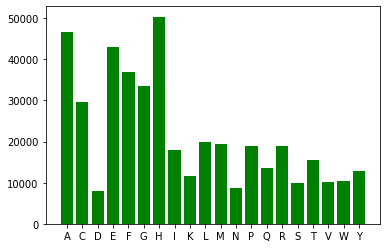

-------------Position  2 --------------
{'S': 35887, 'Q': 12418, 'L': 40973, 'C': 15084, 'Y': 9139, 'R': 50790, 'V': 35634, 'T': 18583, 'I': 9575, 'M': 13393, 'K': 14279, 'F': 9981, 'G': 49597, 'P': 21430, 'A': 34083, 'D': 10098, 'W': 20224, 'E': 17742, 'H': 8470, 'N': 8190}


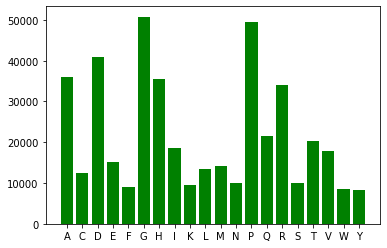

-------------Position  3 --------------
{'G': 52941, 'R': 52744, 'L': 40436, 'T': 17463, 'K': 14446, 'Y': 9113, 'M': 13648, 'I': 9600, 'W': 21264, 'E': 17914, 'A': 33032, 'H': 8333, 'V': 36918, 'Q': 12726, 'N': 7846, 'S': 34751, 'C': 15677, 'F': 9984, 'P': 16693, 'D': 10041}


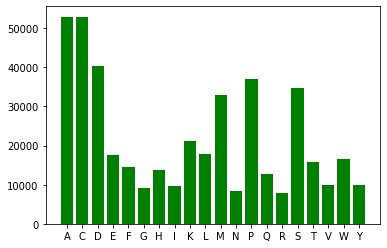

-------------Position  4 --------------
{'R': 51936, 'V': 37872, 'A': 33247, 'S': 33027, 'G': 55111, 'N': 7968, 'C': 15401, 'I': 9702, 'K': 14615, 'E': 18707, 'P': 15685, 'H': 7851, 'T': 16833, 'D': 10665, 'L': 38597, 'M': 13730, 'W': 22434, 'Q': 12158, 'F': 10967, 'Y': 9064}


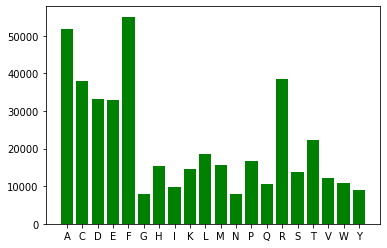

-------------Position  5 --------------
{'K': 14620, 'R': 53180, 'A': 32468, 'G': 55275, 'W': 23700, 'Y': 8800, 'E': 18032, 'V': 39035, 'S': 31691, 'D': 10326, 'T': 17002, 'C': 15782, 'H': 7577, 'I': 10008, 'F': 10673, 'Q': 11405, 'L': 39572, 'P': 14791, 'N': 7511, 'M': 14122}


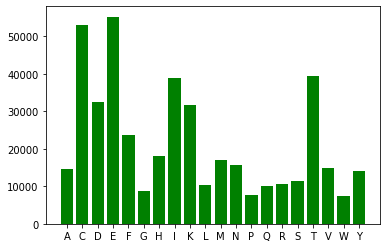

-------------Position  6 --------------
{'I': 8934, 'R': 53660, 'G': 67479, 'A': 33480, 'E': 20217, 'S': 29053, 'F': 9948, 'V': 40120, 'L': 37646, 'M': 12891, 'C': 15464, 'Q': 9938, 'D': 10067, 'W': 23905, 'P': 14056, 'K': 12038, 'T': 15652, 'Y': 7999, 'N': 6679, 'H': 6344}


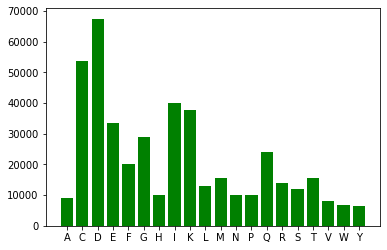

-------------Position  7 --------------
{'M': 11713, 'E': 18765, 'T': 15559, 'G': 70468, 'A': 28119, 'P': 12810, 'S': 31809, 'V': 40039, 'F': 10530, 'N': 7280, 'R': 53788, 'L': 34718, 'Q': 10827, 'K': 11400, 'W': 23068, 'I': 10109, 'D': 11599, 'H': 8714, 'C': 16123, 'Y': 8132}


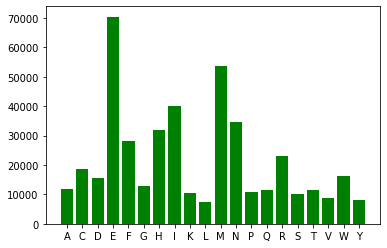

In [7]:
for i in range(1,8):
    char = dict()
    for p in set(all_peptides):
        if p[i] not in char:
            char[p[i]] = 1
        else:
            char[p[i]] += 1
    print("-------------Position ", i, "--------------")
    print(char)
    plt.bar(sorted(list(char.keys())), list(char.values()), color='g')
    plt.show()

-------------Position  0 --------------
{'T': 155139, 'G': 117764, 'C': 133804, 'A': 151111}


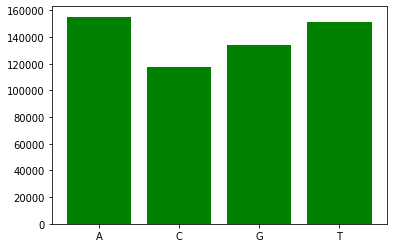

-------------Position  1 --------------
{'T': 157548, 'C': 137292, 'G': 115156, 'A': 147822}


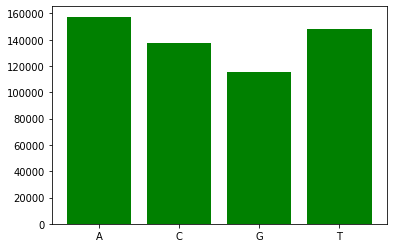

-------------Position  2 --------------
{'A': 146880, 'G': 116169, 'T': 158198, 'C': 136571}


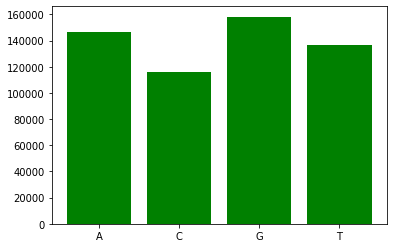

-------------Position  3 --------------
{'T': 160549, 'C': 134201, 'G': 117588, 'A': 145480}


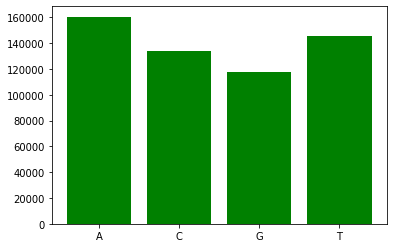

-------------Position  4 --------------
{'G': 115653, 'A': 145729, 'T': 158637, 'C': 137799}


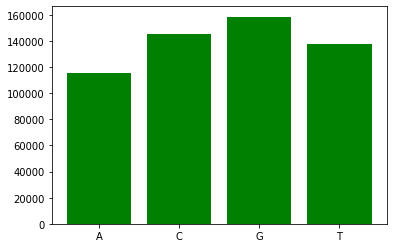

-------------Position  5 --------------
{'G': 113446, 'A': 144847, 'C': 141173, 'T': 158352}


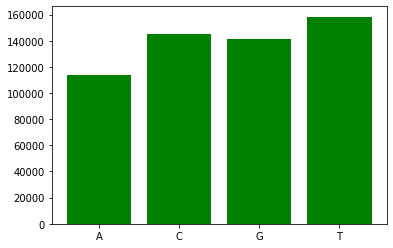

-------------Position  6 --------------
{'T': 160620, 'G': 118245, 'A': 144277, 'C': 134676}


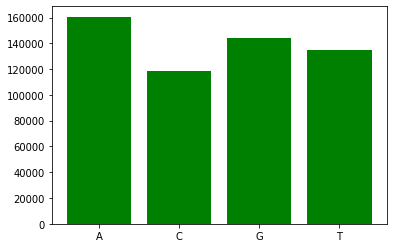

-------------Position  7 --------------
{'T': 159429, 'A': 145906, 'C': 137473, 'G': 115010}


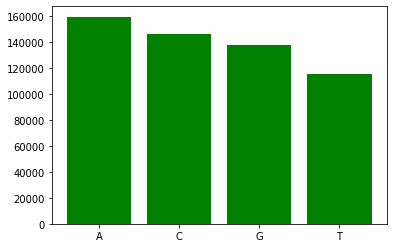

-------------Position  8 --------------
{'G': 114962, 'A': 144513, 'C': 138303, 'T': 160040}


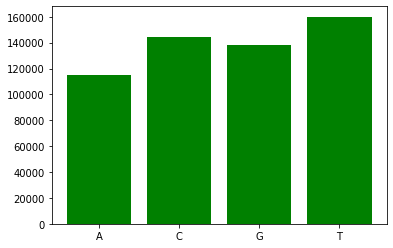

-------------Position  9 --------------
{'T': 161288, 'G': 116252, 'A': 143889, 'C': 136389}


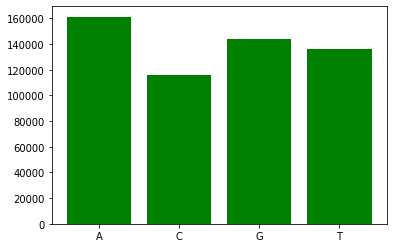

-------------Position  10 --------------
{'C': 137438, 'A': 145561, 'T': 158917, 'G': 115902}


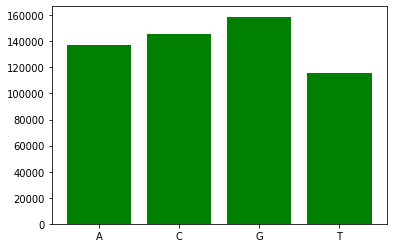

-------------Position  11 --------------
{'G': 114122, 'A': 144961, 'T': 160024, 'C': 138711}


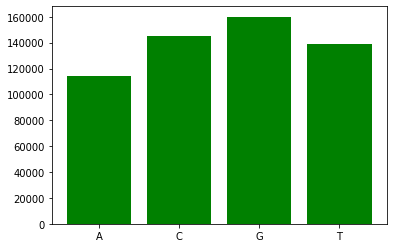

-------------Position  12 --------------
{'A': 143447, 'T': 163341, 'C': 134828, 'G': 116202}


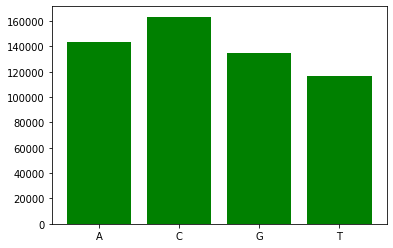

-------------Position  13 --------------
{'C': 138630, 'A': 143955, 'G': 113836, 'T': 161397}


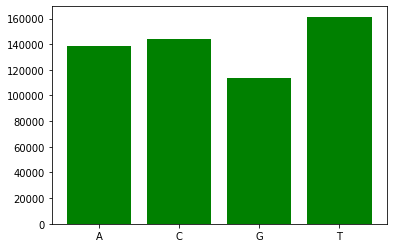

-------------Position  14 --------------
{'T': 161144, 'G': 114416, 'C': 138424, 'A': 143834}


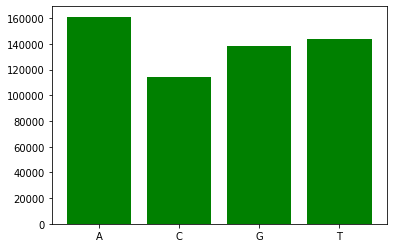

-------------Position  15 --------------
{'G': 114872, 'T': 161646, 'C': 137388, 'A': 143912}


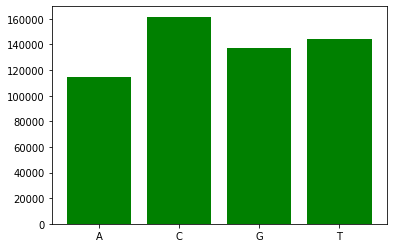

-------------Position  16 --------------
{'G': 115676, 'A': 144186, 'C': 137407, 'T': 160549}


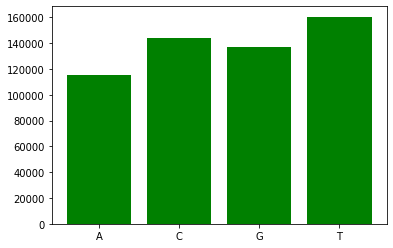

-------------Position  17 --------------
{'A': 143380, 'C': 136399, 'T': 161353, 'G': 116686}


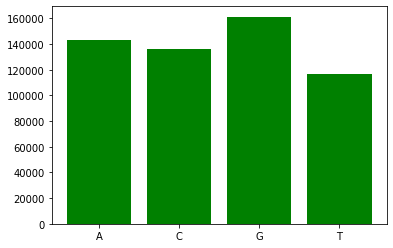

-------------Position  18 --------------
{'T': 164839, 'A': 143128, 'G': 116894, 'C': 132957}


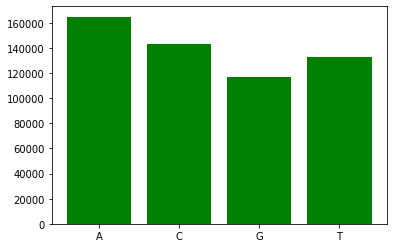

-------------Position  19 --------------
{'T': 168682, 'A': 143287, 'G': 111642, 'C': 134207}


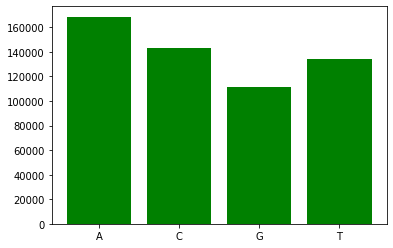

-------------Position  20 --------------
{'T': 156093, 'G': 108951, 'C': 137927, 'A': 154847}


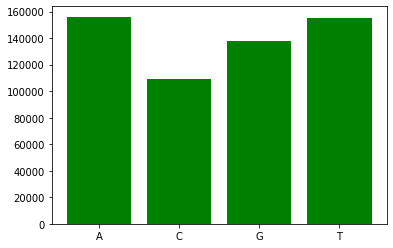

-------------Position  21 --------------
{'A': 158280, 'C': 138933, 'T': 152359, 'G': 108246}


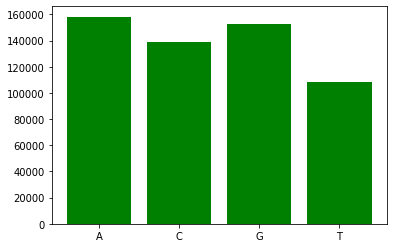

-------------Position  22 --------------
{'C': 139321, 'T': 158359, 'A': 146602, 'G': 113536}


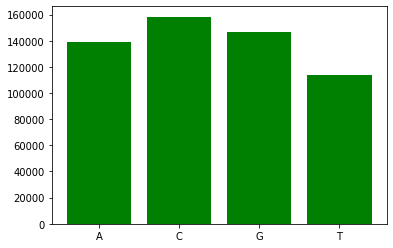

-------------Position  23 --------------
{'A': 146589, 'C': 139470, 'T': 158142, 'G': 113617}


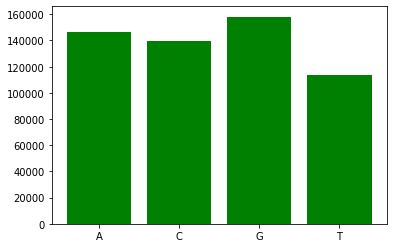

-------------Position  24 --------------
{'C': 134058, 'G': 123090, 'T': 160866, 'A': 139804}


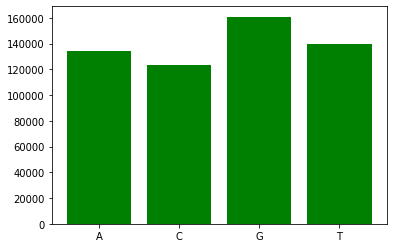

-------------Position  25 --------------
{'T': 158734, 'A': 150683, 'C': 136351, 'G': 112050}


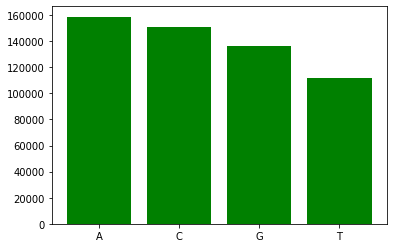

-------------Position  26 --------------
{'T': 154036, 'A': 156636, 'G': 111990, 'C': 135156}


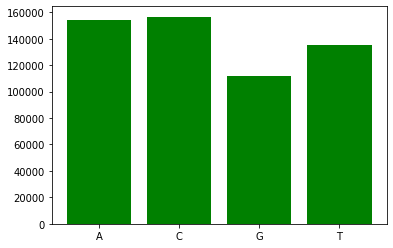

-------------Position  27 --------------
{'C': 136744, 'A': 145000, 'T': 161187, 'G': 114887}


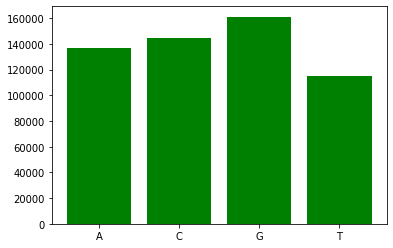

-------------Position  28 --------------
{'T': 159337, 'G': 116387, 'A': 146800, 'C': 135294}


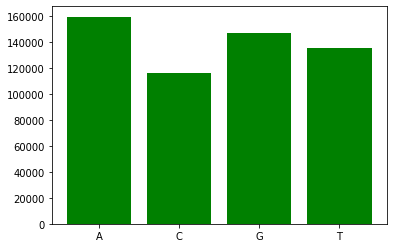

-------------Position  29 --------------
{'T': 159863, 'A': 147822, 'G': 115567, 'C': 134566}


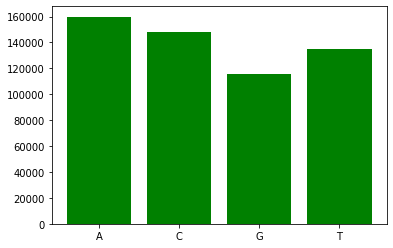

-------------Position  30 --------------
{'A': 139405, 'C': 132532, 'G': 116291, 'T': 169590}


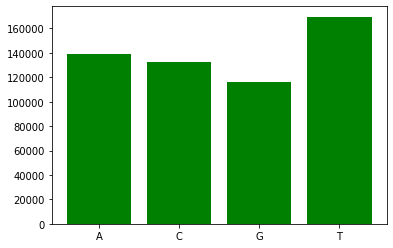

-------------Position  31 --------------
{'T': 168344, 'C': 134748, 'G': 113224, 'A': 141502}


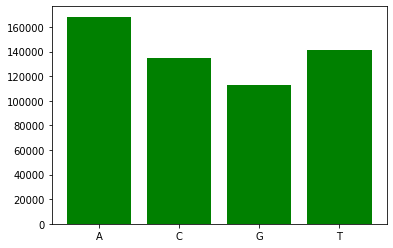

-------------Position  32 --------------
{'T': 167116, 'C': 137824, 'G': 110545, 'A': 142333}


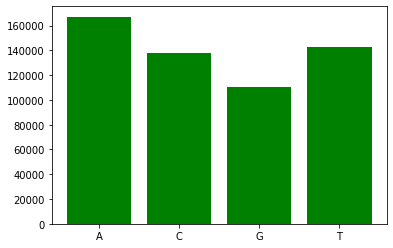

-------------Position  33 --------------
{'C': 138081, 'T': 164628, 'A': 143481, 'G': 111628}


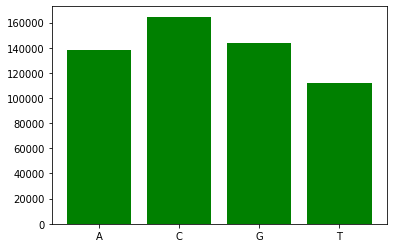

-------------Position  34 --------------
{'G': 118615, 'C': 134397, 'T': 166088, 'A': 138718}


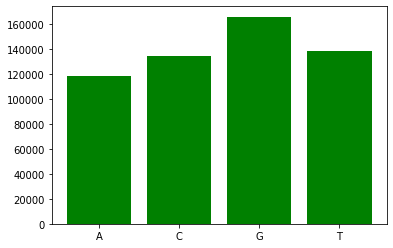

-------------Position  35 --------------
{'A': 139524, 'G': 117500, 'C': 134850, 'T': 165944}


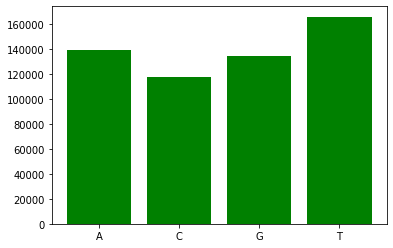

-------------Position  36 --------------
{'T': 163106, 'C': 137548, 'G': 117124, 'A': 140040}


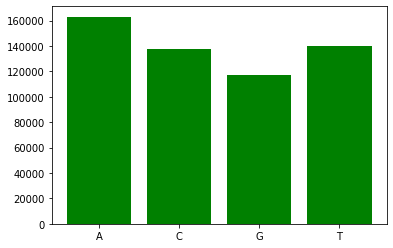

-------------Position  37 --------------
{'G': 120117, 'T': 165087, 'A': 142023, 'C': 130591}


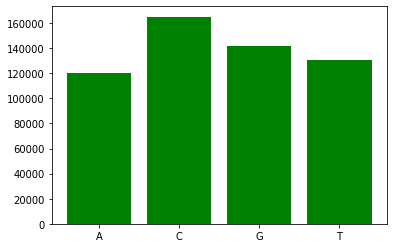

-------------Position  38 --------------
{'T': 164223, 'C': 128287, 'G': 123568, 'A': 141740}


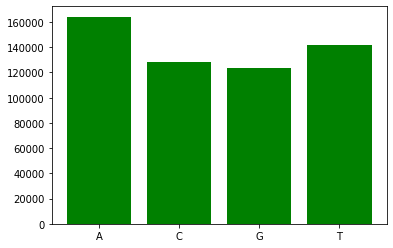

-------------Position  39 --------------
{'C': 136069, 'A': 141642, 'G': 110362, 'T': 169745}


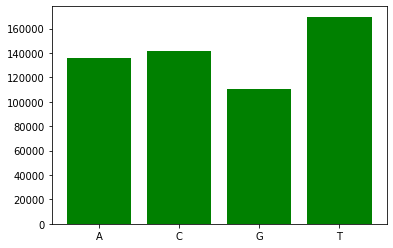

In [8]:
for i in range(40):
    char = dict()
    for a in set(all_aptamers):
        if a[i] not in char:
            char[a[i]] = 1
        else:
            char[a[i]] += 1
    print("-------------Position ", i, "--------------")
    print(char)
    plt.bar(sorted(list(char.keys())), list(char.values()), color='g')
    plt.show()